In [1]:
# https://python-course.eu/numerical-programming/data-visualization-with-pandas.php

<AxesSubplot: >

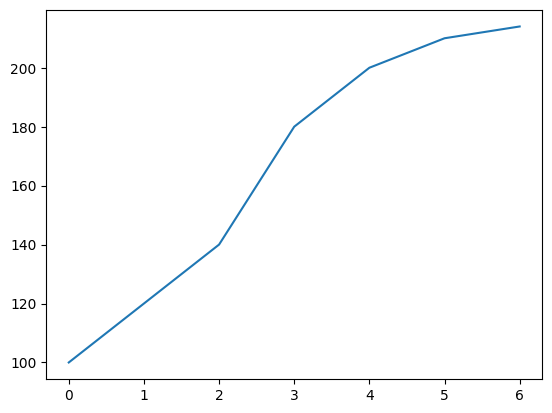

In [2]:
import pandas as pd

data = [100, 120, 140, 180, 200, 210, 214]
s = pd.Series(data, index=range(len(data)))

s.plot()

<AxesSubplot: >

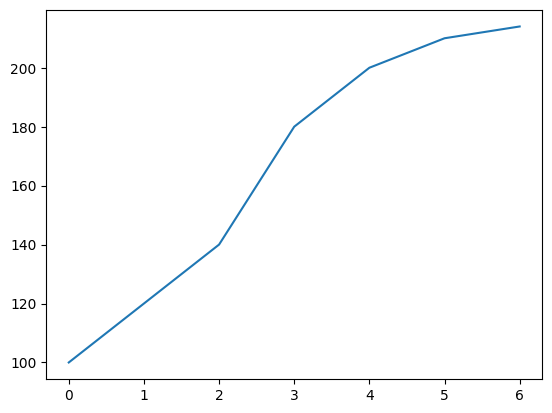

In [3]:
s.plot(use_index=False)

<AxesSubplot: >

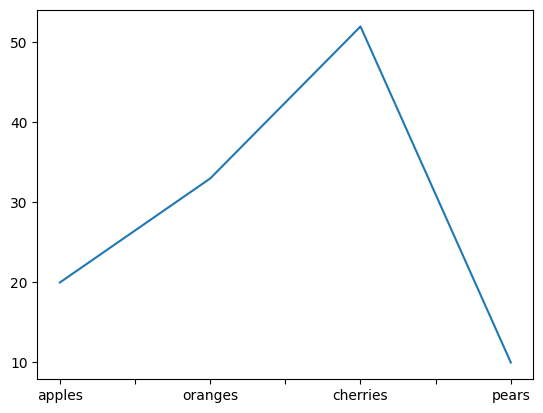

In [4]:
fruits = ['apples', 'oranges', 'cherries', 'pears']
quantities = [20, 33, 52, 10]
S = pd.Series(quantities, index=fruits)
S.plot()

In [5]:
import pandas as pd

cities = {"name": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "area" : [1572, 891.85, 605.77, 1285, 
                    105.4, 414.6, 228, 755, 
                    525.2, 517, 101.9, 310.4, 
                    181.8]
}

city_frame = pd.DataFrame(cities,
                          columns=["population", "area"],
                          index=cities["name"])
print(city_frame)

           population     area
London        8615246  1572.00
Berlin        3562166   891.85
Madrid        3165235   605.77
Rome          2874038  1285.00
Paris         2273305   105.40
Vienna        1805681   414.60
Bucharest     1803425   228.00
Hamburg       1760433   755.00
Budapest      1754000   525.20
Warsaw        1740119   517.00
Barcelona     1602386   101.90
Munich        1493900   310.40
Milan         1350680   181.80


<AxesSubplot: >

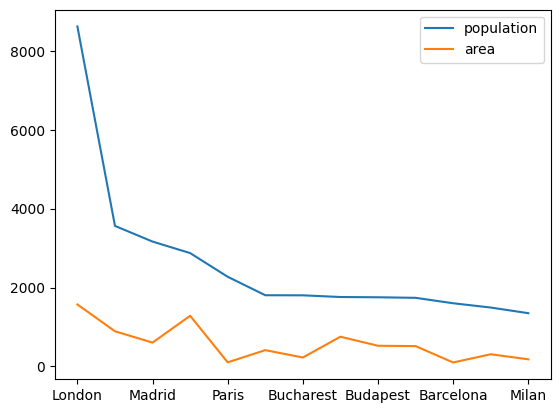

In [6]:
city_frame["population"] /= 1000
city_frame.plot()

<AxesSubplot: >

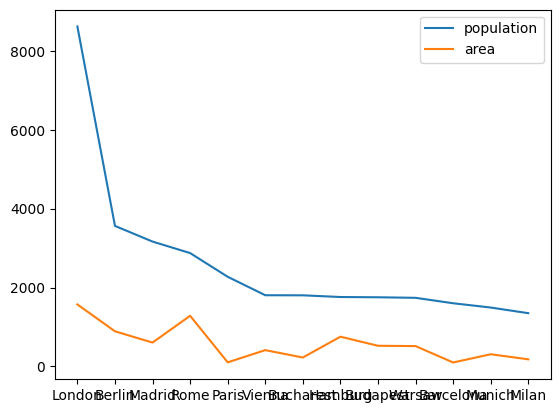

In [7]:
city_frame.plot(xticks=range(len(city_frame.index)),
                use_index=True)

<AxesSubplot: >

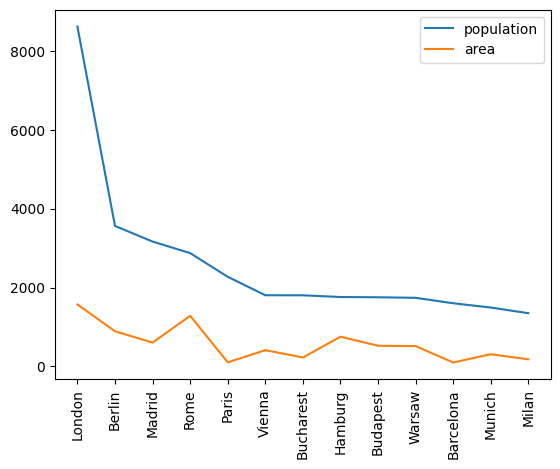

In [8]:
city_frame.plot(xticks=range(len(city_frame.index)),
                use_index=True, 
                rot=90)

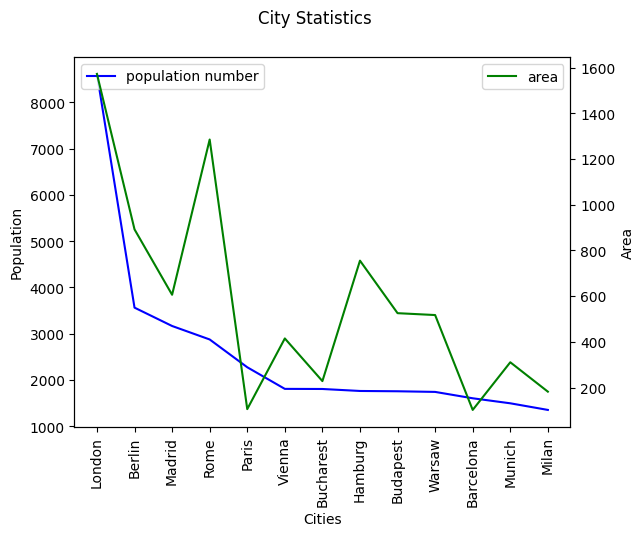

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.suptitle("City Statistics")
ax.set_ylabel("Population")
ax.set_xlabel("Cities")

ax2 = ax.twinx()
ax2.set_ylabel("Area")

city_frame["population"].plot(ax=ax, 
                              style="b-",
                              xticks=range(len(city_frame.index)),
                              use_index=True, 
                              rot=90)

city_frame["area"].plot(ax=ax2, 
                        style="g-",
                        use_index=True, 
                        rot=90)

ax.legend(["population number"], loc=2)
ax2.legend(loc=1)

plt.show()

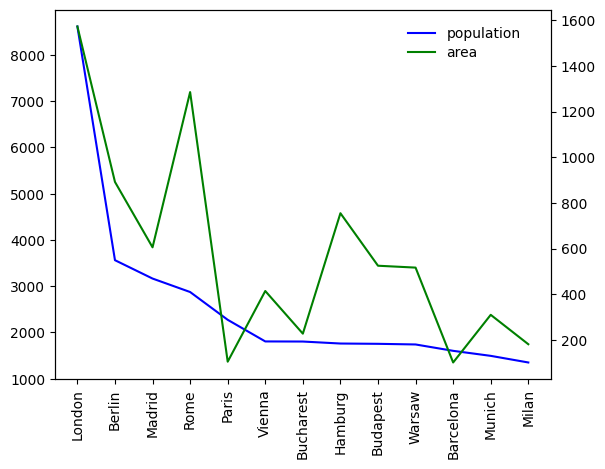

In [10]:
import matplotlib.pyplot as plt

ax1= city_frame["population"].plot(style="b-",
                                   xticks=range(len(city_frame.index)),
                                   use_index=True, 
                                   rot=90)
ax2 = ax1.twinx()

city_frame["area"].plot(ax=ax2,
                        style="g-",
                        use_index=True,
                        #secondary_y=True,
                        rot=90)



ax1.legend(loc = (.7,.9), frameon = False)
ax2.legend( loc = (.7, .85), frameon = False)

plt.show()

In [11]:
city_frame["density"] = city_frame["population"] / city_frame["area"]

city_frame

,population,area,density
London,8615.246,1572.00,5.480436
Berlin,3562.166,891.85,3.994131
Madrid,3165.235,605.77,5.225143
Rome,2874.038,1285.00,2.236605
Paris,2273.305,105.40,21.568359
Vienna,1805.681,414.60,4.355236
Bucharest,1803.425,228.00,7.909759
Hamburg,1760.433,755.00,2.331699
Budapest,1754.000,525.20,3.339680
Warsaw,1740.119,517.00,3.365801


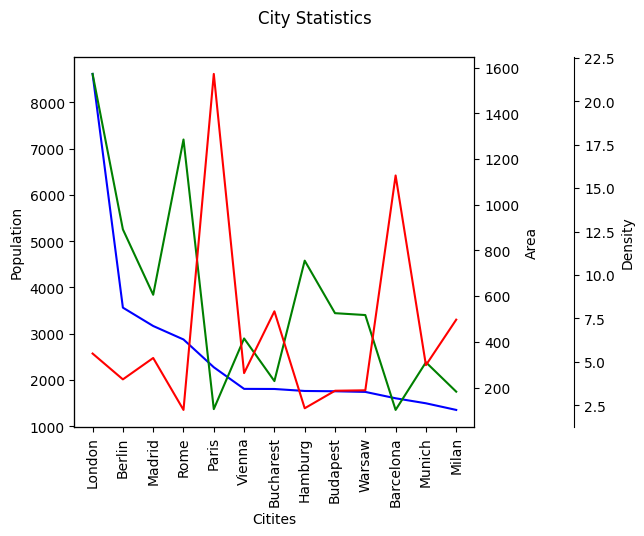

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.suptitle("City Statistics")
ax.set_ylabel("Population")
ax.set_xlabel("Citites")

ax_area, ax_density = ax.twinx(), ax.twinx() 
ax_area.set_ylabel("Area")
ax_density.set_ylabel("Density")

rspine = ax_density.spines['right']
rspine.set_position(('axes', 1.25))
ax_density.set_frame_on(True)
ax_density.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

city_frame["population"].plot(ax=ax, 
                              style="b-",
                              xticks=range(len(city_frame.index)),
                              use_index=True, 
                              rot=90)

city_frame["area"].plot(ax=ax_area, 
                        style="g-",
                        use_index=True, 
                        rot=90)

city_frame["density"].plot(ax=ax_density, 
                           style="r-",
                           use_index=True, 
                           rot=90)

plt.show()

<AxesSubplot: xlabel='Month'>

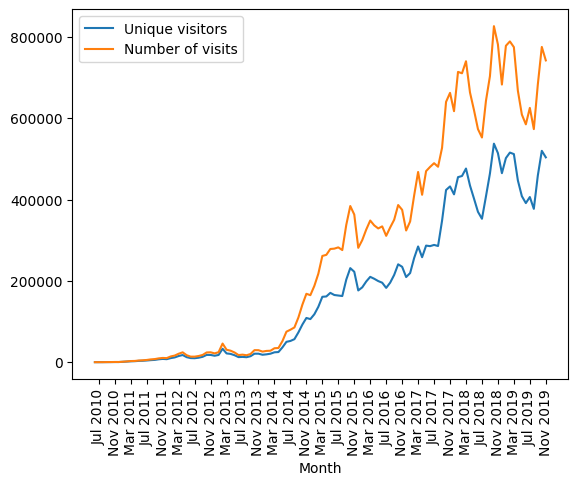

In [14]:
import pandas as pd

data_path = "./data1/"
data = pd.read_csv(data_path + "python_course_monthly_history.txt", 
                   quotechar='"',
                   thousands=",",
                   delimiter=r"\s+")

def unit_convert(x):
    value, unit = x
    if unit == "MB":
        value *= 1024
    elif unit == "GB":
        value *= 1048576 # i.e. 1024 **2
    return value

b_and_u= data[["Bandwidth", "Unit"]]
bandwidth = b_and_u.apply(unit_convert, axis=1)

del data["Unit"]
data["Bandwidth"] = bandwidth

month_year =  data[["Month", "Year"]]
month_year = month_year.apply(lambda x: x[0] + " " + str(x[1]), 
                              axis=1)
data["Month"] = month_year
del data["Year"]

data.set_index("Month", inplace=True)
del data["Bandwidth"]

data[["Unique visitors", "Number of visits"]].plot(use_index=True, 
                                                   rot=90,
                                                   xticks=range(1, len(data.index),4))

<AxesSubplot: xlabel='Month'>

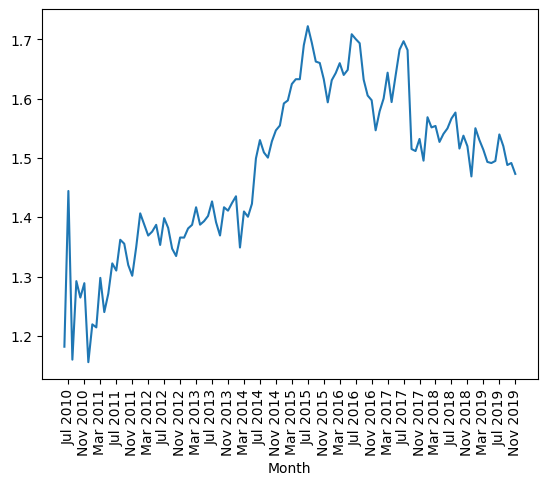

In [15]:
ratio = pd.Series(data["Number of visits"] / data["Unique visitors"],
                  index=data.index)
ratio.plot(use_index=True, 
           xticks=range(1, len(ratio.index),4),
           rot=90)

In [28]:
def strip_percentage_sign(x):
    return float(x.strip('%'))

data_path = "./data1/"
progs = pd.read_csv(data_path + "tiobe_programming_language_usage_nov2018.txt", 
                   quotechar='"',
                   thousands=",",
                   index_col=1,
                   converters={'Percentage':strip_percentage_sign},
                   delimiter=r"\s+")

del progs["Position"]

progs

,Percentage
Language,
Java,16.748
C,14.396
C++,8.282
Python,7.683
Visual Basic .NET,6.490
C#,3.952
JavaScript,2.655
PHP,2.376
SQL,1.844


In [43]:
def strip_percentage_sign(x):
    return float(x.strip('%'))

data_path = "./data1/"
progs = pd.read_csv(data_path + "tiobe2021.txt", 
                   quotechar='"',
                   thousands=",",
                   index_col=1,
                   converters={'Ratings':strip_percentage_sign},
                   delimiter=r"\s+")

del progs["Position"]

progs

,Ratings,Change
Language,,
Python,17.18,+5.41%
C,15.08,+4.35%
Java,11.98,+1.26%
C++,10.75,+2.46%
C#,4.25,-1.81%
Visual Basic,4.11,-1.61%
JavaScript,2.74,+0.08%
Assembly language,2.18,-0.34%
SQL,1.82,-0.30%


<AxesSubplot: xlabel='Language'>

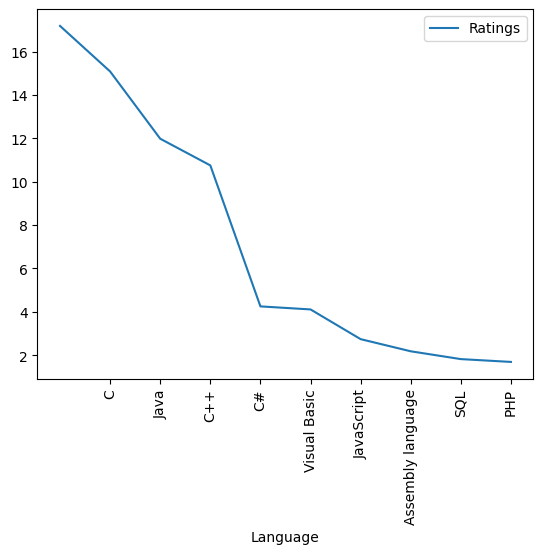

In [44]:
progs.plot(xticks=range(1, len(progs.index)),
           use_index=True, rot=90)

<AxesSubplot: >

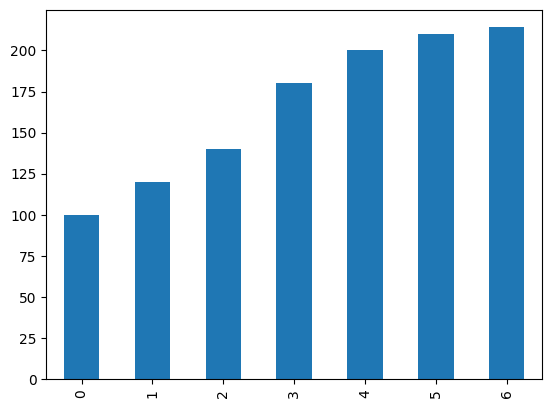

In [39]:
import pandas as pd

data = [100, 120, 140, 180, 200, 210, 214]
s = pd.Series(data, index=range(len(data)))

s.plot(kind="bar")

<AxesSubplot: xlabel='Language'>

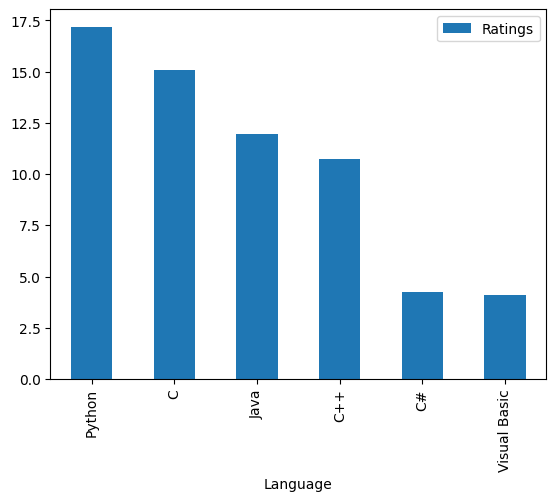

In [45]:
progs[:6].plot(kind="bar")

<AxesSubplot: xlabel='Language'>

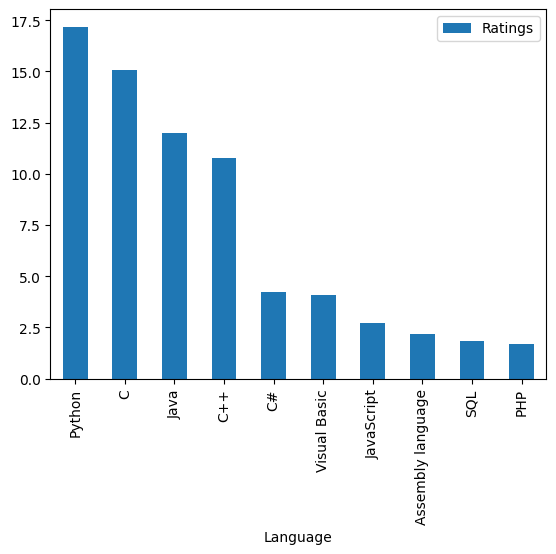

In [46]:
progs.plot(kind="bar")

<AxesSubplot: ylabel='series'>

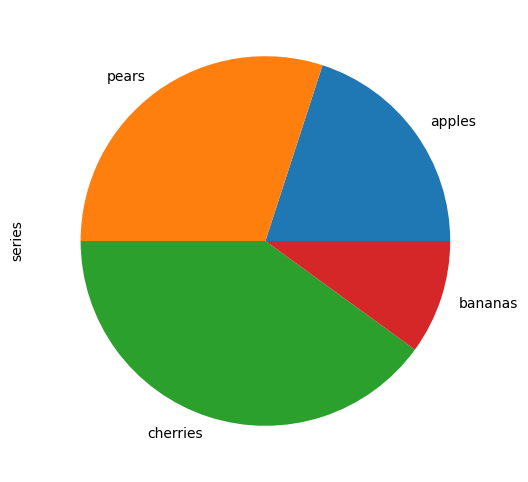

In [48]:
fruits = ['apples', 'pears', 'cherries', 'bananas']
series = pd.Series([20, 30, 40, 10], 
                   index=fruits, 
                   name='series')

series.plot.pie(figsize=(6, 6))

<AxesSubplot: ylabel='series'>

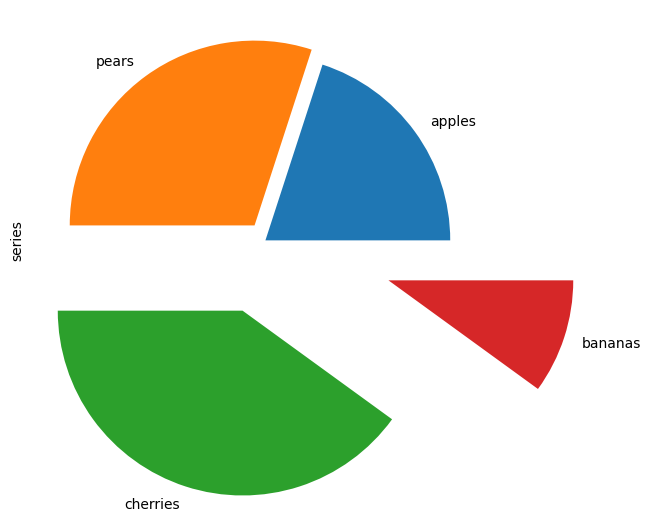

In [49]:
fruits = ['apples', 'pears', 'cherries', 'bananas']

series = pd.Series([20, 30, 40, 10], 
                   index=fruits, 
                   name='series')
explode = [0, 0.10, 0.40, 0.7]
series.plot.pie(figsize=(6, 6),
                explode=explode)

<AxesSubplot: >

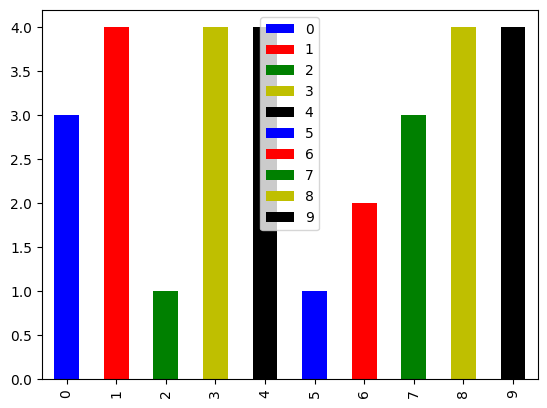

In [51]:
from matplotlib import pyplot as plt
from itertools import cycle, islice
import pandas, numpy as np  # I find np.random.randint to be better

# Make the data
x = [{i:np.random.randint(1,5)} for i in range(10)]
df = pandas.DataFrame(x)

# Make a list by cycling through the colors you care about
# to match the length of your data.
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))

# Specify this list of colors as the `color` option to `plot`.
df.plot(kind='bar', stacked=True, color=my_colors)